In [2]:
import tarfile
from PIL import Image

In [77]:
filename1 = "c:/Users/henry/Documents/GitHub/spacenet/data/raw/SN1_buildings_train_AOI_1_Rio_3band.tar.gz"
file_obj = tarfile.open(filename1,'r')
namelist = file_obj.getnames()
print('number of files')
all_names = []
for name in namelist:
    all_names.append(name)
print(len(all_names))
file_obj.getmembers()
file_name1 = '3band/3band_AOI_1_RIO_img6080.tif'
#file_name2 = '3band/3band_AOI_1_RIO_img373.tif'
file_obj.extract(member=file_name1, path="c:/Users/henry/Documents/GitHub/spacenet/data/interim/")
image6080 = 'c:/Users/henry/Documents/GitHub/spacenet/data/interim/3band/3band_AOI_1_RIO_img6080.tif'
image373 = 'c:/Users/henry/Documents/GitHub/spacenet/data/interim/3band/3band_AOI_1_RIO_img373.tif '

im = Image.open(image373)
im.show()

number of files
6941


In [4]:
import rasterio as rio

In [7]:
filename8band = 'c:/Users/henry/Documents/GitHub/spacenet/data/raw/SN1_buildings_train_AOI_1_Rio_8band.tar.gz'
file_obj8band = tarfile.open(filename8band,'r')
file_obj8band.getmembers()

[<TarInfo '8band' at 0x28cad13dd80>,
 <TarInfo '8band/8band_AOI_1_RIO_img6924.tif' at 0x28cac3babc0>,
 <TarInfo '8band/8band_AOI_1_RIO_img3895.tif' at 0x28cad13da80>,
 <TarInfo '8band/8band_AOI_1_RIO_img4653.tif' at 0x28cad13dfc0>,
 <TarInfo '8band/8band_AOI_1_RIO_img543.tif' at 0x28cad13e140>,
 <TarInfo '8band/8band_AOI_1_RIO_img3858.tif' at 0x28cad13e200>,
 <TarInfo '8band/8band_AOI_1_RIO_img5789.tif' at 0x28cad13e2c0>,
 <TarInfo '8band/8band_AOI_1_RIO_img5196.tif' at 0x28cad13e380>,
 <TarInfo '8band/8band_AOI_1_RIO_img2330.tif' at 0x28cad13e440>,
 <TarInfo '8band/8band_AOI_1_RIO_img6174.tif' at 0x28cad13e500>,
 <TarInfo '8band/8band_AOI_1_RIO_img5531.tif' at 0x28cad13e5c0>,
 <TarInfo '8band/8band_AOI_1_RIO_img118.tif' at 0x28cad13e680>,
 <TarInfo '8band/8band_AOI_1_RIO_img1607.tif' at 0x28cad13e740>,
 <TarInfo '8band/8band_AOI_1_RIO_img4305.tif' at 0x28cad13e800>,
 <TarInfo '8band/8band_AOI_1_RIO_img5991.tif' at 0x28cad13e8c0>,
 <TarInfo '8band/8band_AOI_1_RIO_img2240.tif' at 0x28ca

In [26]:
file_name8band= '8band/8band_AOI_1_RIO_img427.tif'
file_obj8band.extract(member=file_name8band, path="c:/Users/henry/Documents/GitHub/spacenet/data/interim/")

In [33]:
image8band6924 = 'c:/Users/henry/Documents/GitHub/spacenet/data/interim/8band/8band_AOI_1_RIO_img6924.tif' 
image8band427 = 'c:/Users/henry/Documents/GitHub/spacenet/data/interim/8band/8band_AOI_1_RIO_img427.tif' 

In [11]:
import rasterio as rio

In [12]:
def rasterio_open(f: str) -> rio.io.DatasetReader:
    '''
      rasterio_open: open file path f using rasterio (as rio)
    '''
    return rio.open(f)

In [28]:
src_image = rasterio_open(image8band6924)
src_image1 = rasterio_open(image8band427)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from rasterio.plot import show

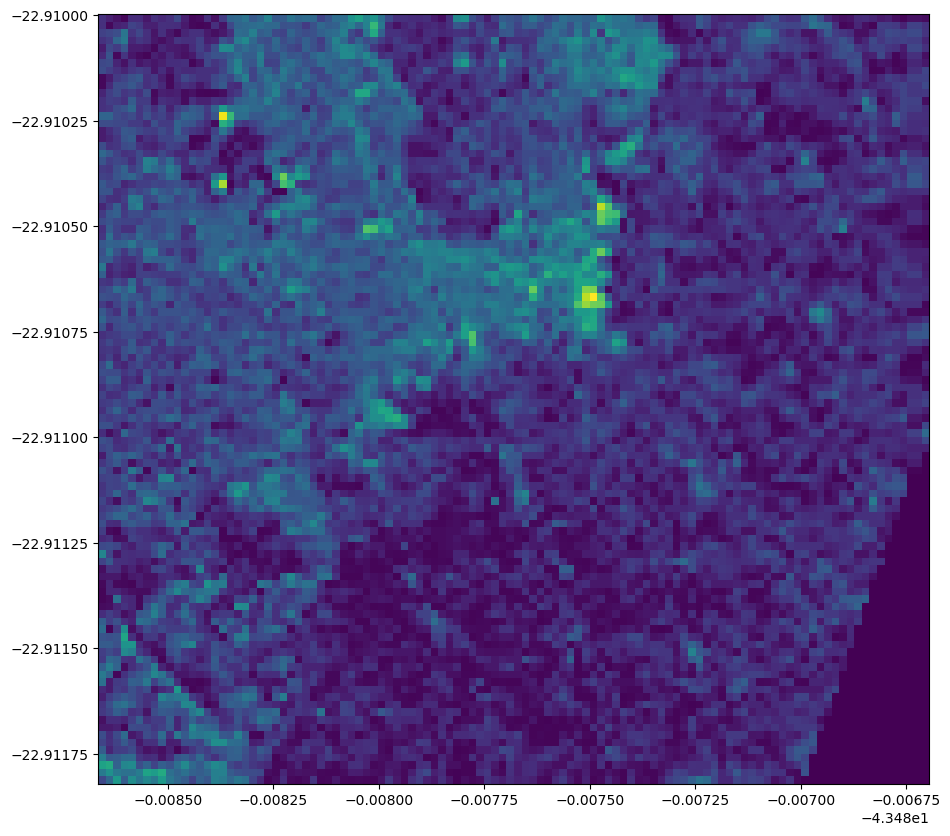

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

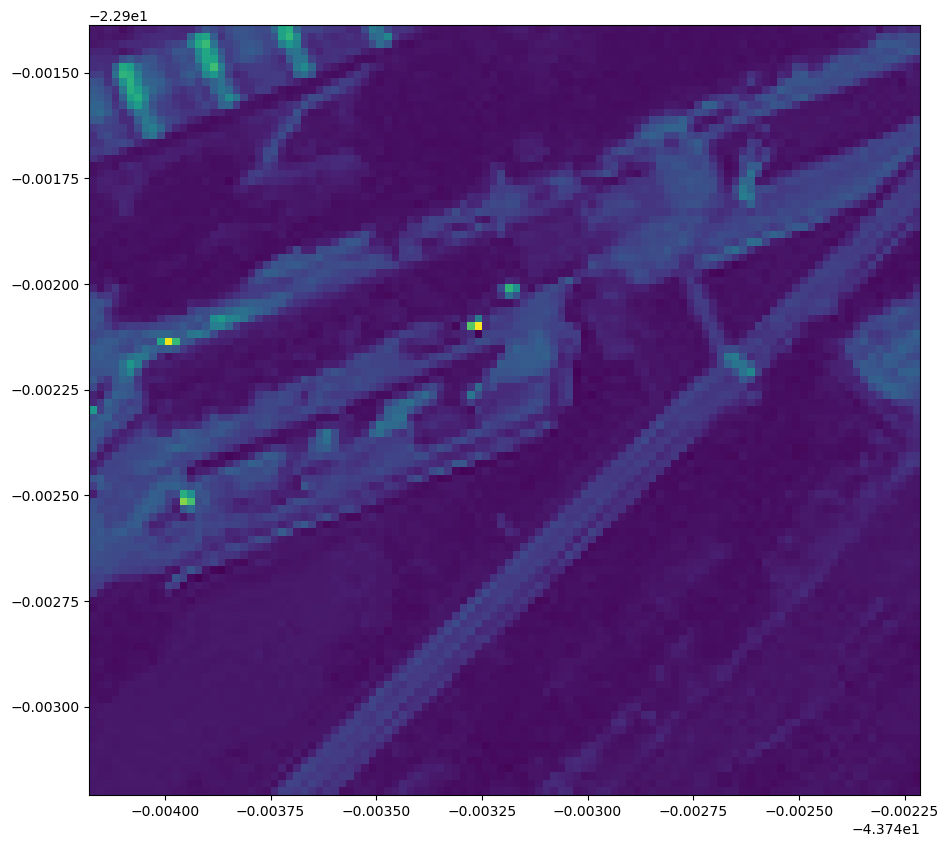

In [29]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image1, ax=ax)
plt.show()

In [37]:
from osgeo import gdal
import numpy as np


In [64]:
ds = gdal.Open(image8band427)
r = ds.GetRasterBand(4).ReadAsArray()
g = ds.GetRasterBand(3).ReadAsArray()
b = ds.GetRasterBand(2).ReadAsArray()
nir = ds.GetRasterBand(5).ReadAsArray()
swir = ds.GetRasterBand(6).ReadAsArray()
swir2 = ds.GetRasterBand(7).ReadAsArray()
caerosol = ds.GetRasterBand(1).ReadAsArray()
pan = ds.GetRasterBand(8).ReadAsArray()

In [40]:
ds = None

In [48]:
def scaleMinMax(x):
    return((x-np.nanmin(x))/(np.nanmax(x)-np.nanmin(x))) 

In [65]:
r = scaleMinMax(r)
g = scaleMinMax(g)
b = scaleMinMax(b)
nir = scaleMinMax(nir)
swir = scaleMinMax(swir)
swir2 = scaleMinMax(swir2)
caerosol = scaleMinMax(caerosol)
pan = scaleMinMax(pan)

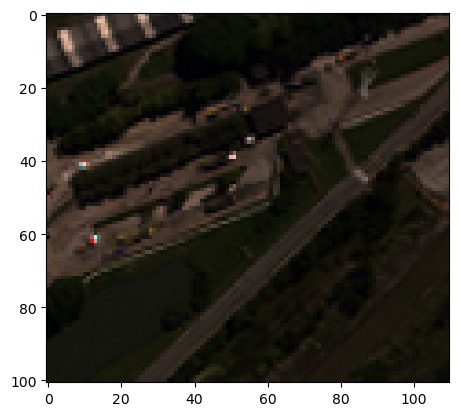

In [67]:
rgb = np.dstack((r,g,b))
plt.figure()
plt.imshow(rgb)
plt.show()

In [68]:
GeoJSON_filename1 = "c:/Users/henry/Documents/GitHub/spacenet/data/raw/SN1_buildings_train_AOI_1_Rio_geojson_buildings.tar.gz"
GeoJSON_file_obj = tarfile.open(GeoJSON_filename1,'r')
GeoJSON_namelist = GeoJSON_file_obj.getnames()
print('number of files')
all_names = []
for name in GeoJSON_namelist:
    all_names.append(name)
print(len(all_names))


number of files
6941


In [69]:
GeoJSON_file_obj.getmembers()

[<TarInfo 'geojson' at 0x28cafc62e00>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img5792.geojson' at 0x28cafc63a00>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img3048.geojson' at 0x28cafc63880>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img3411.geojson' at 0x28cafc63ac0>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img2812.geojson' at 0x28cafc62c80>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img1272.geojson' at 0x28cafc63e80>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img6368.geojson' at 0x28cafc63940>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img3626.geojson' at 0x28cafc63d00>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img5451.geojson' at 0x28cafc63dc0>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img1618.geojson' at 0x28cafc63c40>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img3359.geojson' at 0x28cafc63f40>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img718.geojson' at 0x28cb0860100>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img549.geojson' at 0x28cb08601c0>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img1757.geojson' at 0x28cb0860040>,
 <TarInfo 'geojson/Geo_AOI_1_RIO_img3903.geojson' at 0x28cb0860340

In [72]:
GeoJSON_file_name = 'geojson/Geo_AOI_1_RIO_img5792.geojson'
#file_name2 = '3band/3band_AOI_1_RIO_img373.tif'
GeoJSON_file_obj.extract(member=GeoJSON_file_name, path="c:/Users/henry/Documents/GitHub/spacenet/data/interim/")
GeoJSON_image5792 = 'c:/Users/henry/Documents/GitHub/spacenet/data/interim/geojson/Geo_AOI_1_RIO_img5792.geojson'



In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

geoFileInfo = gpd.read_file('c:/Users/henry/Documents/GitHub/spacenet/data/interim/geojson/Geo_AOI_1_RIO_img5792.geojson')

In [75]:
geoFileInfo

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,QAStatus,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry
0,2016-06-24 20:32:00+00:00,1,5824,Derick,43,121412.0,yes,None,way/170104,yes,Original_Building,121412.0,West,No,0.000447,0.0,0.0,1.000000,"POLYGON Z ((-43.54179 -22.87637 0.00000, -43.5..."
1,2016-06-24 20:35:43+00:00,1,5824,Derick,43,121411.0,yes,None,way/172303,yes,Original_Building,121411.0,West,No,0.000655,0.0,0.0,1.000000,"POLYGON Z ((-43.54187 -22.87638 0.00000, -43.5..."
2,2016-06-24 20:42:34+00:00,1,5837,Derick,43,121504.0,yes,None,way/176428,yes,Original_Building,121504.0,West,No,0.000322,0.0,1.0,0.013743,"POLYGON Z ((-43.54254 -22.87619 0.00000, -43.5..."
3,2016-06-24 20:42:40+00:00,1,5837,Derick,43,121482.0,yes,None,way/176505,yes,Original_Building,121482.0,West,No,0.000331,0.0,0.0,1.000000,"POLYGON Z ((-43.54222 -22.87716 0.00000, -43.5..."
4,2016-06-24 20:47:36+00:00,1,5837,Derick,43,121488.0,yes,None,way/180159,yes,Original_Building,121488.0,West,No,0.000338,0.0,0.0,1.000000,"POLYGON Z ((-43.54205 -22.87670 0.00000, -43.5..."
5,2016-06-24 20:57:58+00:00,1,5837,Derick,43,121489.0,yes,None,way/188392,yes,Original_Building,121489.0,West,No,0.000328,0.0,0.0,1.000000,"POLYGON Z ((-43.54201 -22.87644 0.00000, -43.5..."
6,2016-06-24 21:00:34+00:00,1,5837,Derick,43,121491.0,yes,None,way/189678,yes,Original_Building,121491.0,West,No,0.000329,0.0,0.0,1.000000,"POLYGON Z ((-43.54218 -22.87645 0.00000, -43.5..."
7,2016-06-24 21:04:39+00:00,1,5837,Derick,43,121443.0,yes,None,way/192720,yes,Modified_Original_Rev1,121443.0,West,Yes,0.000320,0.0,0.0,1.000000,"POLYGON Z ((-43.54269 -22.87786 0.00000, -43.5..."
8,2016-06-24 21:06:26+00:00,1,5837,Derick,43,121474.0,yes,None,way/194162,yes,Original_Building,121474.0,West,No,0.000397,0.0,0.0,1.000000,"POLYGON Z ((-43.54203 -22.87727 0.00000, -43.5..."
9,2016-06-24 21:06:49+00:00,1,5837,Derick,43,121451.0,yes,None,way/194464,yes,Original_Building,121451.0,West,No,0.000324,0.0,0.0,1.000000,"POLYGON Z ((-43.54299 -22.87789 0.00000, -43.5..."


<AxesSubplot: >

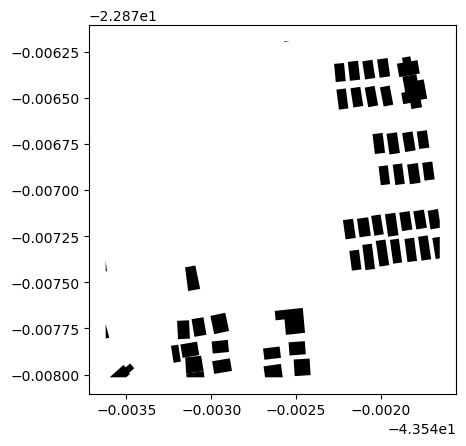

In [76]:
geoFileInfo.plot(color='black')